<a href="https://colab.research.google.com/github/datdinhstore99/abc/blob/master/Datndchuviettay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

link = "https://storage.googleapis.com/kaggle-data-sets/9726/17999/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1588213997&Signature=nexEOiH6n5CsD4v8hcXb7kKaVhQngSehbsp7VDdk6egUEQke8wP4zPRM4uU%2BDylMyDgU91%2Bz%2FURv5iGOa%2Fy5rDeZiiRGtUS0Ftym2fkmHcID4DFTW9mBll7VE8GJUPtkHHGN4IC2oJUx81%2BM3uwY9ZFUUHAkT0KjL4xyK2t%2BWKG1DAfHL2EqR01fNcdfC8t5LTWf0cxHXkjKkR%2BuPlsMKvY3TKi%2B%2BOgDrdwP0apYM1359xcKgkf%2F9tPG%2F8UTGUGpCGiZvdpT%2Fnjbf7oLJ%2Ba7LdKWgY62hCVOy1Jy3PlrDa0%2B%2F3XEwFdSlzue4FNcb%2BA2kGojUclhPvEuSi0ntfVO%2FQ%3D%3D&response-content-disposition=attachment%3B+filename%3Daz-handwritten-alphabets-in-csv-format.zip"


In [3]:
!pip install wge
import wget
wget.download(link)


ERROR: Could not find a version that satisfies the requirement wge (from versions: none)
ERROR: No matching distribution found for wge


'az-handwritten-alphabets-in-csv-format (2).zip'

In [4]:
data ="./" 
!unzip -q az-handwritten-alphabets-in-csv-format.zip -d $data

replace ./A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./A_Z Handwritten Data/A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y


In [5]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential

from keras.utils import np_utils
import keras
from keras.models import Model
from keras.models import Sequential,Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense

Using TensorFlow backend.


In [0]:
train_link = data + "A_Z Handwritten Data.csv"
import pickle
with open(train_link, mode="r") as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)

In [7]:
print(rows[1000])
print(np.shape(rows[1000]))

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '222', '184', '151', '64', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '95', '255', '255', '107', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '42', '255', '255', '210', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  60 162 255 255 255
  255 255 255 224 100   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  46  77 233 255 255 255 236
  246 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 167  65
  116 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  19 185 255 255 255 255 150   3   0
   32 218 255 236 162   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15 175 255 255 255 255 155 

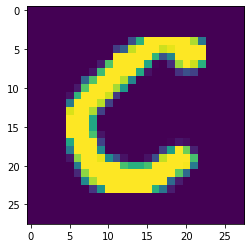

In [8]:
letter = rows[30000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28,28)

print(letter[10])
plt.imshow(x)
print(x)

In [0]:
train_data = []
train_label = []

for letter in rows :
  if letter[0] == '0' or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
      x = np.array([int(j) for j in letter[1:]])
      train_data.append(x)
      train_label.append(int(letter[0]))
  else:
      break

In [0]:
print(len(train_label))




print(train_label)
print(train_x[15])



In [0]:
import random

shuffle_order = list(range(56081))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

In [11]:
print(train_data.shape)
train_x = train_data[:50000]
train_y = train_label[:50000]

val_x = train_data[50000:53000]
val_y = train_label[50000:53000]

test_x = train_data[53000:]
test_y = train_label[53000:]

(56081, 784)


0


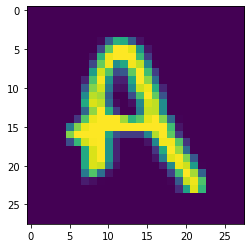

In [12]:
print(train_y[10])
x = train_x[10].reshape(28,28)
plt.imshow(x)


In [0]:
# reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
train_x = train_x.reshape(-1,28,28,1)/255.0
val_x = val_x.reshape(-1,28,28,1)/255.0
test_x = test_x.reshape(-1,28,28,1)/255.0

In [0]:
train_y = keras.utils.to_categorical(train_y, 4)
val_y = keras.utils.to_categorical(val_y,4)
test_y = keras.utils.to_categorical(test_y, 4)

In [15]:
train_x.shape

(50000, 28, 28, 1)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten layer chuyển từ tensor sang vector 
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm relu
model.add(Dense(128, activation='relu'))
# Output layer với 4 node và dùng softmax function để chuyển sang xác suất.
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức # đùng để tối ưu hàm loss function. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [17]:
print("Start training")

H = model.fit(train_x,train_y, validation_data=(val_x, val_y),batch_size=32, epochs=10, verbose=1)

Start training
Train on 50000 samples, validate on 3000 samples
Epoch 1/10
50000/50000 [==============================] - 138s 3ms/step - loss: 0.0546 - accuracy: 0.9821 - val_loss: 0.0119 - val_accuracy: 0.9960
Epoch 2/10
50000/50000 [==============================] - 135s 3ms/step - loss: 0.0185 - accuracy: 0.9950 - val_loss: 0.0092 - val_accuracy: 0.9973
Epoch 3/10
50000/50000 [==============================] - 136s 3ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0057 - val_accuracy: 0.9983
Epoch 4/10
50000/50000 [==============================] - 137s 3ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0132 - val_accuracy: 0.9967
Epoch 5/10
50000/50000 [==============================] - 136s 3ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0050 - val_accuracy: 0.9980
Epoch 6/10
50000/50000 [==============================] - 136s 3ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 7/10
50000/50000 [========================

In [18]:
score = model.evaluate(test_x,test_y,verbose = 0)
print(score)

[0.0028316806865012817, 0.9993508458137512]


Giá trị dự đoán:  3


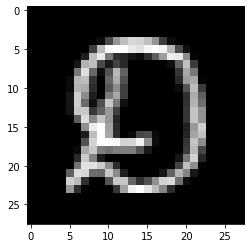

In [19]:
plt.imshow(test_x[0].reshape(28,28), cmap='gray')
y_predict = model.predict(test_x[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

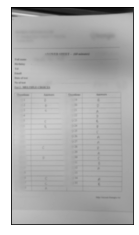

In [47]:
#Xac định bài toán object detection

img = cv2.imread("./anhtracnghiem.jpg",0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [0]:
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

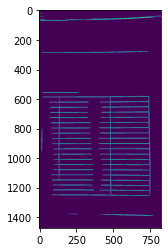

In [31]:
horizal = thresh
vertical = thresh

scale_height = 20 #Scale này để càng cao thì số dòng dọc xác định sẽ càng nhiều
scale_long = 15

long = int(img.shape[1]/scale_long)
height = int(img.shape[0]/scale_height)

horizalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (long, 1))
horizal = cv2.erode(horizal, horizalStructure, (-1, -1))
horizal = cv2.dilate(horizal, horizalStructure, (-1, -1))

verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, height))
vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))

mask = vertical + horizal
plt.imshow(mask)



In [0]:
 #xác định ra vị trí của bảng thông qua bức hình trên
 #hàm findCountours sẽ giúp chúng ta lấy ra vị trí của các vật thể kín trong 1 bức ảnh
 #chúng ta lấy vật thể lớn nhất đó chính là bảng điền
 
 contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

max = -1
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if cv2.contourArea(cnt) > max:
        x_max, y_max, w_max, h_max = x, y, w, h
        max = cv2.contourArea(cnt)

In [0]:
table = img[y_max:y_max+h_max, x_max:x_max+w_max]


In [0]:
# chia bảng ra theo các tỷ lệ nhằm cắt được các ô đáp án một cách gần chính xác nhất
# mỗi ô đáp án cần, chúng ta sẽ lại sử dụng hàm findCountours để xác định ra ký tự được viết ở ô đó

cropped_thresh_img = []
cropped_origin_img = []
countours_img = []

NUM_ROWS = 19
START_ROW = 1
for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(w_max/6):x_max +round(w_max/2)]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(w_max/6):x_max +round(w_max/2)]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)

for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(2*w_max/3):x_max +round(w_max)]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(2*w_max/3):x_max +round(w_max)]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)
    

In [0]:
#thêm một vài điều kiện nhằm đảm bảo tính chính xác của đầu ra ta thu được các đáp án
for i, countour_img in enumerate(countours_img):
    for cnt in countour_img:
        if cv2.contourArea(cnt) > 30:
             x,y,w,h = cv2.boundingRect(cnt)
             if x > cropped_origin_img[i].shape[1]*0.1 and x < cropped_origin_img[i].shape[1]*0.9:
                 answer = cropped_origin_img[i][y:y+h, x:x+w]
                 answer = cv2.threshold(answer, 160, 255, cv2.THRESH_BINARY_INV)[1]


In [57]:
print(answer)


# plt.imshow(answer.reshape(28,28), cmap='gray')
# y_predict = model.predict(test_x[0].reshape(1,28,28,1))
# print('Giá trị dự đoán: ', np.argmax(y_predict))

[[  0   0   0   0 255 255 255   0   0   0   0   0   0]
 [  0   0   0 255 255 255 255 255   0   0   0   0   0]
 [  0   0 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0 255 255 255   0 255 255 255   0   0   0   0]
 [  0 255 255 255   0 255   0 255 255   0   0   0   0]
 [  0 255 255 255   0 255   0 255 255   0   0   0   0]
 [255 255 255 255   0   0 255 255 255   0   0   0   0]
 [255 255 255 255 255 255 255 255   0   0   0   0   0]
 [255 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0 255 255 255 255   0   0   0   0   0   0   0   0]
 [255 255 255 255 255   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255   0   0   0   0   0   0 255 255 255]
 [  0 255 255 255   0   0   0   0   0   0   0 255 255]
 [  0 255 255 255   0   0   0   0   0   0 255 255 255]
 [  0   0 255 255   0   0   0   0   0   0 255 255 255]
 [  0   0 

In [37]:
res = []
res.append(np.argmax(model.predict(answer), axis=-1))
letter = ['A', 'B', 'C', 'D']

result = []
for r in res:
    if len(r) == 0:
        result.append("X")
    elif len(r) > 1:
        result.append("O")
    else:
        result.append(letter[int(r[0])])


print(result)


ValueError: ignored